# Assignment. 자동차 평가 데이터에 대한 EDA 및 Decision Tree를 활용한 예측

In [134]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [135]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


## [Mission 1] 모든 속성들을 수치형 데이터로 변환

buying={'vhigh':1,'high':2,'med':3,'low':4}  
maint={'vhigh':1,'high':2,'med':3,'low':4}  
doors={'1':1,'2':2,'3':3,'4':4,'5more':5}  
persons={'1':1,'2':2,'3':3,'4':4,'more':5}  
log_boot={'small':1,'med':2,'big':3}  
safety={'high':1,'med':2,'low':3}  
eval={'unacc':1,'acc':2,'good':3,'vgood':4}  

In [136]:
df['buying']=df['buying'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['maint']=df['maint'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['doors']=df['doors'].map({'1':1,'2':2,'3':3,'4':4,'5more':5})
df['persons']=df['persons'].map({'1':1,'2':2,'3':3,'4':4,'more':5})
df['log_boot']=df['log_boot'].map({'small':1,'med':2,'big':3})
df['safety']=df['safety'].map({'high':1,'med':2,'low':3})
df['eval']=df['eval'].map({'unacc':1,'acc':2,'good':3,'vgood':4})
df

,buying,maint,doors,persons,log_boot,safety,eval
0,1,1,2,2,1,3,1
1,1,1,2,2,1,2,1
2,1,1,2,2,1,1,1
3,1,1,2,2,2,3,1
4,1,1,2,2,2,2,1
5,1,1,2,2,2,1,1
6,1,1,2,2,3,3,1
7,1,1,2,2,3,2,1
8,1,1,2,2,3,1,1
9,1,1,2,4,1,3,1


In [137]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,3.500000,3.666667,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733,0.740700
min,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,2.750000,2.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,3.500000,4.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,4.250000,5.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,5.000000,5.000000,3.000000,3.000000,4.000000


buying={'vhigh':1,'high':2,'med':3,'low':4}  
maint={'vhigh':1,'high':2,'med':3,'low':4}  
doors={'1':1,'2':2,'3':3,'4':4,'5more':5}  
persons={'1':1,'2':2,'3':3,'4':4,'more':5}  
log_boot={'small':1,'med':2,'big':3}  
safety={'high':1,'med':2,'low':3}  
eval={'unacc':1,'acc':2,'good':3,'vgood':4}  

## [Mission 2] Target 4개별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출

In [138]:
dfGroup=df.groupby('eval')

In [139]:
dfGroup.groups

{1: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
 

In [140]:
dfGroup.size()

eval
1    1210
2     384
3      69
4      65
dtype: int64

buying={'vhigh':1,'high':2,'med':3,'low':4}  
maint={'vhigh':1,'high':2,'med':3,'low':4}  
doors={'1':1,'2':2,'3':3,'4':4,'5more':5}  
persons={'1':1,'2':2,'3':3,'4':4,'more':5}  
log_boot={'small':1,'med':2,'big':3}  
safety={'high':1,'med':2,'low':3}  
eval={'unacc':1,'acc':2,'good':3,'vgood':4}  

In [141]:
dfGroup.describe()

buying        doors     log_boot        maint      persons  \
eval                                                                          
1    count  1210.000000  1210.000000  1210.000000  1210.000000  1210.000000   
     mean      2.350413     3.454545     1.932231     2.366942     3.314050   
     std       1.118099     1.127152     0.819754     1.127547     1.304272   
     min       1.000000     2.000000     1.000000     1.000000     2.000000   
     25%       1.000000     2.000000     1.000000     1.000000     2.000000   
     50%       2.000000     3.000000     2.000000     2.000000     4.000000   
     75%       3.000000     4.000000     3.000000     3.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   
2    count   384.000000   384.000000   384.000000   384.000000   384.000000   
     mean      2.575521     3.585938     2.101562     2.591146     4.484375   
     std       1.041953     1.094925     0.799868     1.048199     0.500408   
     min       1.000000     2.000000     1.000000     1.000000     4.000000   
     25%       2.000000     3.000000     1.000000     2.000000     4.000000   
     50%       3.000000     4.000000     2.000000     3.000000     4.000000   
     75%       3.000000     5.000000     3.000000     3.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   
3    count    69.000000    69.000000    69.000000    69.000000    69.000000   
     mean      3.666667     3.565217     2.043478     3.666667     4.478261   
     std       0.474858     1.104513     0.812309     0.474858     0.503187   
     min       3.000000     2.000000     1.000000     3.000000     4.000000   
     25%       3.000000     3.000000     1.000000     3.000000     4.000000   
     50%       4.000000     4.000000     2.000000     4.000000     4.000000   
     75%       4.000000     5.000000     3.000000     4.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   
4    count    65.000000    65.000000    65.000000    65.000000    65.000000   
     mean      3.600000     3.769231     2.615385     3.200000     4.538462   
     std       0.493710     1.057255     0.490290     0.754155     0.502398   
     min       3.000000     2.000000     2.000000     2.000000     4.000000   
     25%       3.000000     3.000000     2.000000     3.000000     4.000000   
     50%       4.000000     4.000000     3.000000     3.000000     5.000000   
     75%       4.000000     5.000000     3.000000     4.000000     5.000000   
     max       4.000000     5.000000     3.000000     4.000000     5.000000   

                 safety  
eval                     
1    count  1210.000000  
     mean      2.247107  
     std       0.802763  
     min       1.000000  
     25%       2.000000  
     50%       2.000000  
     75%       3.000000  
     max       3.000000  
2    count   384.000000  
     mean      1.468750  
     std       0.499674  
     min       1.000000  
     25%       1.000000  
     50%       1.000000  
     75%       2.000000  
     max       2.000000  
3    count    69.000000  
     mean      1.565217  
     std       0.499360  
     min       1.000000  
     25%       1.000000  
     50%       2.000000  
     75%       2.000000  
     max       2.000000  
4    count    65.000000  
     mean      1.000000  
     std       0.000000  
     min       1.000000  
     25%       1.000000  
     50%       1.000000  
     75%       1.000000  
     max       1.000000

/Users/zoostar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


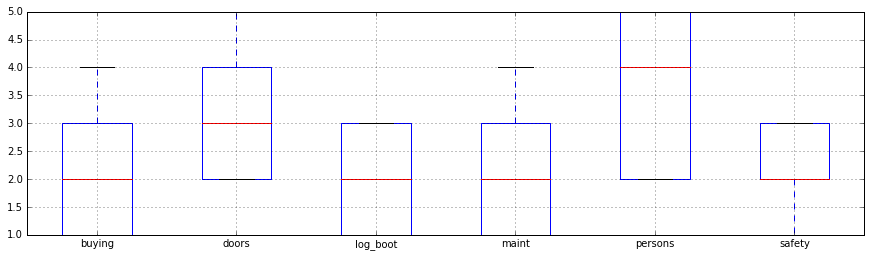

In [142]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(1).boxplot(ax=ax)
plt.show()

buying={'vhigh':1,'high':2,'med':3,'low':4}  
maint={'vhigh':1,'high':2,'med':3,'low':4}  
doors={'1':1,'2':2,'3':3,'4':4,'5more':5}  
persons={'1':1,'2':2,'3':3,'4':4,'more':5}  
log_boot={'small':1,'med':2,'big':3}  
safety={'high':1,'med':2,'low':3}  
eval={'unacc':1,'acc':2,'good':3,'vgood':4}  

/Users/zoostar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


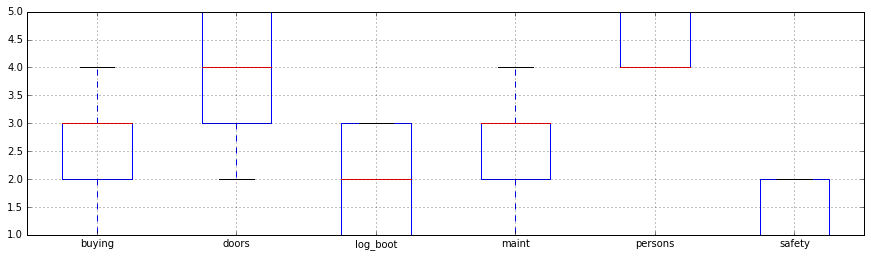

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(2).boxplot(ax=ax)
plt.show()

/Users/zoostar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


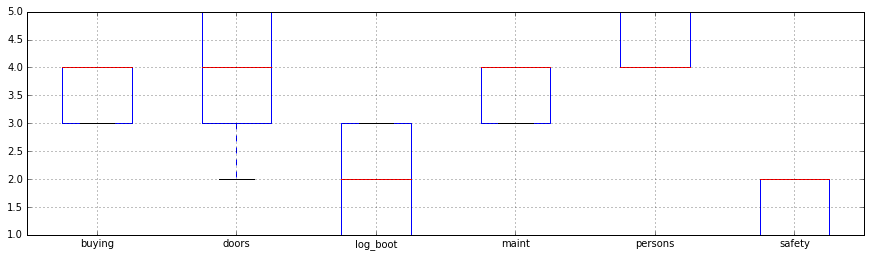

In [144]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(3).boxplot(ax=ax)
plt.show()

buying={'vhigh':1,'high':2,'med':3,'low':4}  
maint={'vhigh':1,'high':2,'med':3,'low':4}  
doors={'1':1,'2':2,'3':3,'4':4,'5more':5}  
persons={'1':1,'2':2,'3':3,'4':4,'more':5}  
log_boot={'small':1,'med':2,'big':3}  
safety={'high':1,'med':2,'low':3}  
eval={'unacc':1,'acc':2,'good':3,'vgood':4}  

/Users/zoostar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


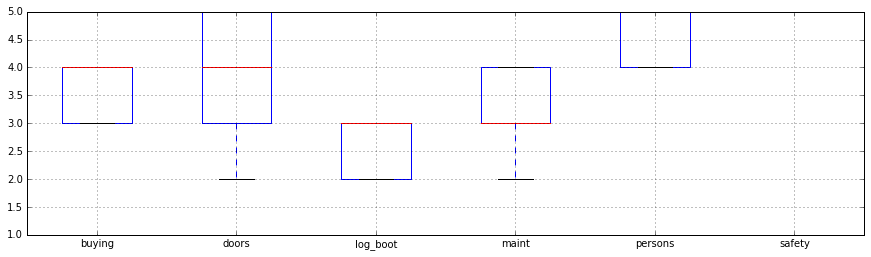

In [145]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
dfGroup.get_group(4).boxplot(ax=ax)
plt.show()

## [Mission 3] 각 속성들을 두 개씩 쌍을 지어서 각 쌍마다 Scatter Plot 그리기

In [146]:
df_groups=df.groupby('eval')

In [147]:
df_groups.count()

,buying,maint,doors,persons,log_boot,safety
eval,,,,,,
1,1210,1210,1210,1210,1210,1210
2,384,384,384,384,384,384
3,69,69,69,69,69,69
4,65,65,65,65,65,65


In [148]:
eval_1_df=df[df['eval']== 1]
eval_2_df=df[df['eval']== 2]
eval_3_df=df[df['eval']== 3]
eval_4_df=df[df['eval']== 3]

In [149]:
feature_names=['buying','maint','doors','persons','log_boot','safety']

In [150]:
eval_1_df

,buying,maint,doors,persons,log_boot,safety,eval
0,1,1,2,2,1,3,1
1,1,1,2,2,1,2,1
2,1,1,2,2,1,1,1
3,1,1,2,2,2,3,1
4,1,1,2,2,2,2,1
5,1,1,2,2,2,1,1
6,1,1,2,2,3,3,1
7,1,1,2,2,3,2,1
8,1,1,2,2,3,1,1
9,1,1,2,4,1,3,1


feature_names=['buying','maint','doors','persons','log_boot','safety']

In [151]:
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0] ,
        'label_y': feature_names[1],
    },
    1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0],
        'label_y': feature_names[2] ,
    },
    2: {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0] ,
        'label_y': feature_names[3] ,
    },
    3: {
        'data_x': feature_names[0],
        'data_y': feature_names[4],
        'label_x': feature_names[0] ,
        'label_y': feature_names[4] ,

    },
    4: {
        'data_x': feature_names[0],
        'data_y': feature_names[5],
        'label_x': feature_names[0] ,
        'label_y': feature_names[5] ,
    },
    5: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1] ,
        'label_y': feature_names[2] ,
    },
    6: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1] ,
        'label_y': feature_names[3] ,
    },
    7: {
        'data_x': feature_names[1],
        'data_y': feature_names[4],
        'label_x': feature_names[1] ,
        'label_y': feature_names[4] ,
    },
    8: {
        'data_x': feature_names[1],
        'data_y': feature_names[5],
        'label_x': feature_names[1] ,
        'label_y': feature_names[5] ,
    },
    9: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2] ,
        'label_y': feature_names[3] ,
    },
    10: {
        'data_x': feature_names[2],
        'data_y': feature_names[4],
        'label_x': feature_names[2] ,
        'label_y': feature_names[4] ,
    },
    11: {
        'data_x': feature_names[2],
        'data_y': feature_names[5],
        'label_x': feature_names[2] ,
        'label_y': feature_names[5] ,
    },
    12: {
        'data_x': feature_names[3],
        'data_y': feature_names[4],
        'label_x': feature_names[3] ,
        'label_y': feature_names[4] ,
    },
    13: {
        'data_x': feature_names[3],
        'data_y': feature_names[5],
        'label_x': feature_names[3] ,
        'label_y': feature_names[5] ,
    },
    14: {
        'data_x': feature_names[4],
        'data_y': feature_names[5],
        'label_x': feature_names[4] ,
        'label_y': feature_names[5] ,
    },
}

In [168]:
eval_name=['unacc','acc','good','vgood']

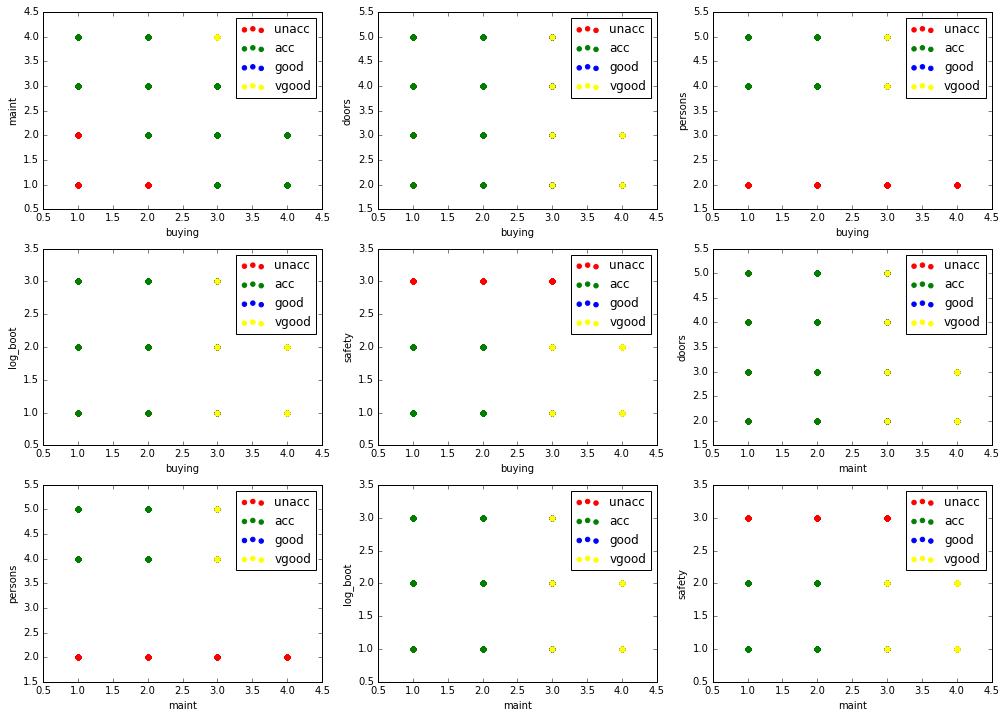

In [169]:
ax = []
fig = plt.figure(figsize=(17, 12))
for i in range(0,9):
    ax.append(fig.add_subplot(330 + (i+1)))

for i in range(0,9):
    s1=ax[i].scatter(eval_1_df[options[i]['data_x']], eval_1_df[options[i]['data_y']], color='red')
    s2=ax[i].scatter(eval_2_df[options[i]['data_x']], eval_2_df[options[i]['data_y']], color='green')
    s3=ax[i].scatter(eval_3_df[options[i]['data_x']], eval_3_df[options[i]['data_y']], color='blue')
    s4=ax[i].scatter(eval_4_df[options[i]['data_x']], eval_4_df[options[i]['data_y']], color='yellow')
    ax[i].legend((s1, s2, s3,s4), eval_name)
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])

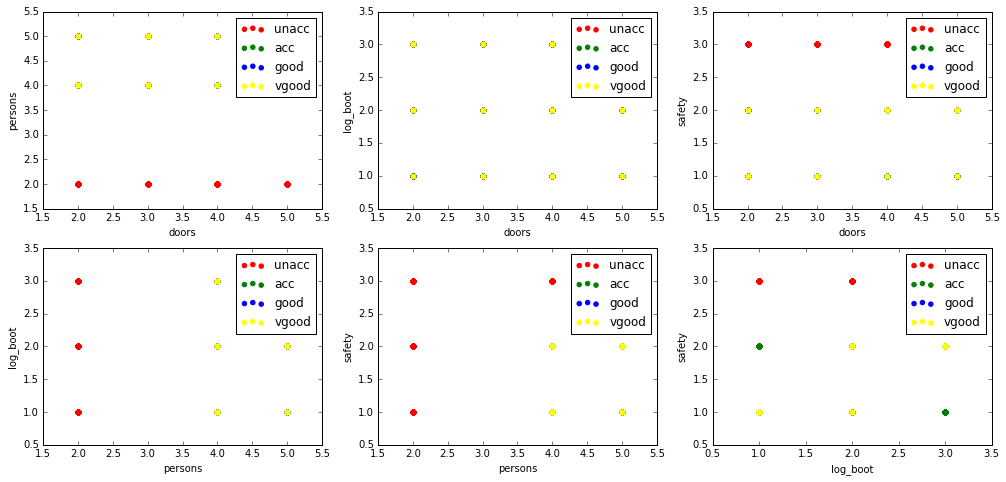

In [170]:
ax = []
fig = plt.figure(figsize=(17, 12))
for i in range(0,6):
    ax.append(fig.add_subplot(330 + (i+1)))

for i in range(0,6):
    s1=ax[i].scatter(eval_1_df[options[i+9]['data_x']], eval_1_df[options[i+9]['data_y']], color='red')
    s2=ax[i].scatter(eval_2_df[options[i+9]['data_x']], eval_2_df[options[i+9]['data_y']], color='green')
    s3=ax[i].scatter(eval_3_df[options[i+9]['data_x']], eval_3_df[options[i+9]['data_y']], color='blue')
    s4=ax[i].scatter(eval_4_df[options[i+9]['data_x']], eval_4_df[options[i+9]['data_y']], color='yellow')
    ax[i].legend((s1, s2, s3,s4), eval_name)
    ax[i].set_xlabel(options[i+9]['label_x'])
    ax[i].set_ylabel(options[i+9]['label_y'])

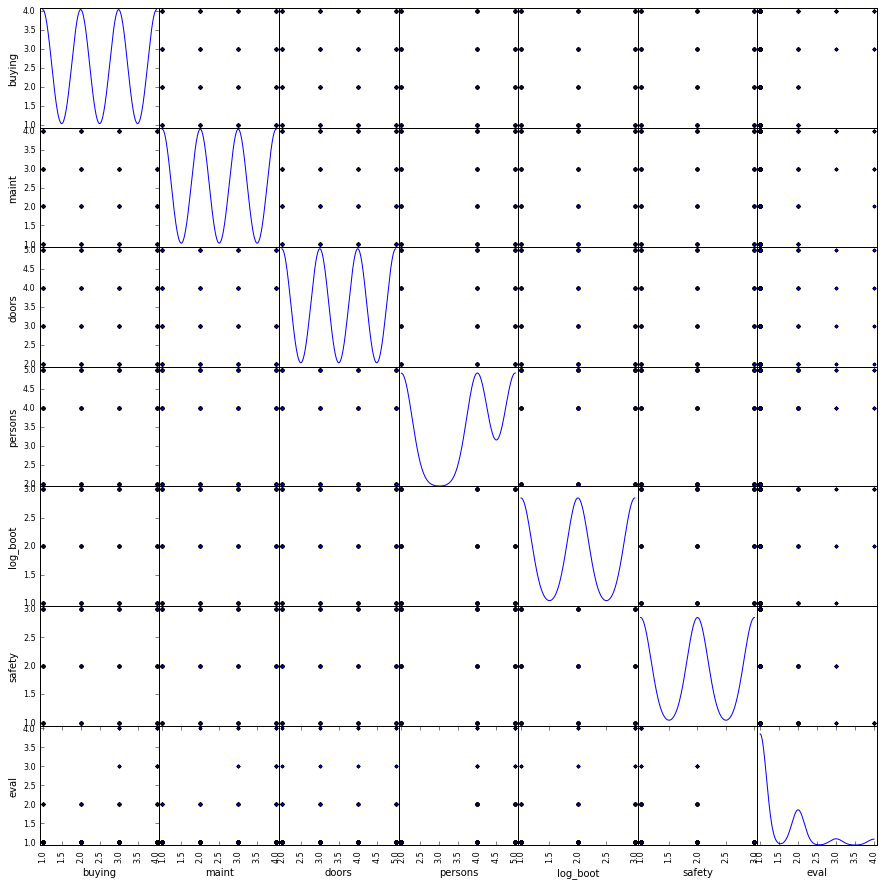

In [165]:
from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df, figsize=(15, 15), diagonal='kde')

## [Mission 4] 전체 데이터 집합에 대한 Entropy 산출

In [ ]:
path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [ ]:
df_per_attr = {}
for i in range(0, 6):
    df_per_attr[i] = {}
    groupby_df = df[[6, i]].groupby(feature_names[i])
    df_per_attr[i]['ngroups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [ ]:
df_per_attr[1]

In [ ]:
from collections import Counter
from math import log

labels = df['eval'].values
n_labels = len(labels)
print n_labels
print

counts = np.array(Counter(labels).values())
print counts
print

probs = counts / float(n_labels)
print probs
print

n_classes = np.count_nonzero(probs)
print n_classes
print

ent = 0.

for i in probs:
    ent -= i * log(i, n_classes)

print ent

In [ ]:
def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute standard entropy.
    for i in probs:
        ent -= i * log(i, n_classes)

    return ent

In [ ]:
entropy(df['eval'].values)

## [Mission 5] Decision Tree 모델 구축을 고려하여 루트노드에서 첫번째 Branch를 위한 IG가 가장 높은 속성 산출

In [ ]:
parent_size = float(len(df))
parent_size

In [ ]:
for i in range(0,6):
        sub_sum_entropy = 0.0
        print i
        for j in range(df_per_attr[i]['ngroups']):
            sub_size = len(df_per_attr[i]['subgroups'][j])
            sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
            print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
            sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
        ig = entropy(df['eval'].values) - sub_sum_entropy
        df_per_attr[i]['information_gain'] = ig
        print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
        print

In [ ]:
import operator
information_gain_dict = {}
for i in range(0,6):
    information_gain_dict[i] = df_per_attr[i]['information_gain']

information_gain_dict

In [ ]:
max(information_gain_dict.iteritems(), key=operator.itemgetter(1))

## [Mission 6] sklearn 모듈을 활용하여 Decision Tree 모델을 구축하고 예측 시도

In [ ]:
from sklearn import tree

In [ ]:
type(df)

In [ ]:
df['buying']=df['buying'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['maint']=df['maint'].map({'vhigh':1,'high':2,'med':3,'low':4})
df['doors']=df['doors'].map({'1':1,'2':2,'3':3,'4':4,'5more':5})
df['persons']=df['persons'].map({'1':1,'2':2,'3':3,'4':4,'more':5})
df['log_boot']=df['log_boot'].map({'small':1,'med':2,'big':3})
df['safety']=df['safety'].map({'high':1,'med':2,'low':3})
df['eval']=df['eval'].map({'unacc':1,'acc':2,'good':3,'vgood':4})

In [ ]:
car_data=df.ix[:, 0:6]
car_data

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(car_data, df[[6]])

In [ ]:
with open("car.dot", 'w') as f:
    tree.export_graphviz(clf, out_file=f)

<img src="car.png">

In [ ]:
any(clf.predict(car_data) == df['eval'])